In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import joblib 

Creacion del DF

In [2]:
df = pd.read_csv('FraminghamScale.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Limpieza de los datos

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
# Rellenar valores nulos con la mediana para todas las columnas numéricas
df.fillna(df.median(), inplace=True)

In [6]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Creamos las variables a utilizar

In [8]:
X = df.drop('TenYearCHD', axis=1)  
y = df['TenYearCHD']               

Procedemos a entrenar el modelo

In [9]:
model = LogisticRegression(max_iter=5000)

model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [10]:
y_pred = model.predict(X)

print("VALORES REALES VS PREDICCIONES\n")
comparaciones = [
    f"Paciente {y.index[i]}: Real: {'CON riesgo' if y.iloc[i] == 1 else 'SIN riesgo'} - "
    f"Predicción: {'CON riesgo' if y_pred[i] == 1 else 'SIN riesgo'} "
    f"{'✅' if y.iloc[i] == y_pred[i] else '❌'}"
    for i in range(10)
]

print('\n'.join(comparaciones))

VALORES REALES VS PREDICCIONES

Paciente 0: Real: SIN riesgo - Predicción: SIN riesgo ✅
Paciente 1: Real: SIN riesgo - Predicción: SIN riesgo ✅
Paciente 2: Real: SIN riesgo - Predicción: SIN riesgo ✅
Paciente 3: Real: CON riesgo - Predicción: SIN riesgo ❌
Paciente 4: Real: SIN riesgo - Predicción: SIN riesgo ✅
Paciente 5: Real: SIN riesgo - Predicción: SIN riesgo ✅
Paciente 6: Real: CON riesgo - Predicción: SIN riesgo ❌
Paciente 7: Real: SIN riesgo - Predicción: SIN riesgo ✅
Paciente 8: Real: SIN riesgo - Predicción: SIN riesgo ✅
Paciente 9: Real: SIN riesgo - Predicción: SIN riesgo ✅


Guardamos el modelo

In [11]:
joblib.dump(model, 'FraminghamScale_model.pkl')

['FraminghamScale_model.pkl']

In [12]:
pacientes = [{
    'male': 1,                
    'age': 65,                
    'education': 1.0,           
    'currentSmoker': 1,        
    'cigsPerDay': 40.0,      
    'BPMeds': 1.0,            
    'prevalentStroke': 1,      
    'prevalentHyp': 1,          
    'diabetes': 1,           
    'totChol': 300.0,          
    'sysBP': 180.0,           
    'diaBP': 110.0,        
    'BMI': 35.0,               
    'heartRate': 95.0,          
    'glucose': 200.0  
},{
    'male': 0,                 
    'age': 30,                 
    'education': 4.0,           
    'currentSmoker': 0,         
    'cigsPerDay': 0.0,          
    'BPMeds': 0.0,              
    'prevalentStroke': 0,     
    'prevalentHyp': 0,         
    'diabetes': 0,             
    'totChol': 170.0,          
    'sysBP': 110.0,          
    'diaBP': 70.0,             
    'BMI': 22.0,               
    'heartRate': 70.0,          
    'glucose': 85.0 
}]

df_pacientes = pd.DataFrame(pacientes)

Ponemos a prueba el modelo

In [13]:
reg = joblib.load('FraminghamScale_model.pkl')

pred = reg.predict(df_pacientes)

for i in range(len(pred)):
    paciente_id = i + 1
    riesgo = "CON riesgo" if pred[i] == 1 else "SIN riesgo"
    print(f"Paciente {paciente_id}: {riesgo}")

Paciente 1: CON riesgo
Paciente 2: SIN riesgo


Graficos

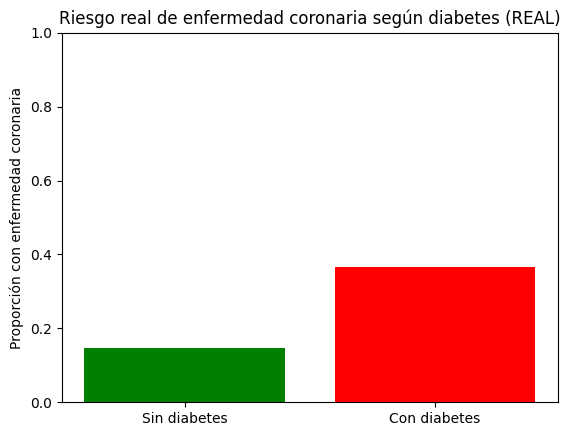

In [14]:
riesgo_por_diabetes = df.groupby('diabetes')['TenYearCHD'].mean()

labels = ['Sin diabetes', 'Con diabetes']
valores = riesgo_por_diabetes.values

plt.bar(labels, valores, color=['green', 'red'])
plt.ylabel('Proporción con enfermedad coronaria')
plt.title('Riesgo real de enfermedad coronaria según diabetes (REAL)')
plt.ylim(0, 1)
plt.show()


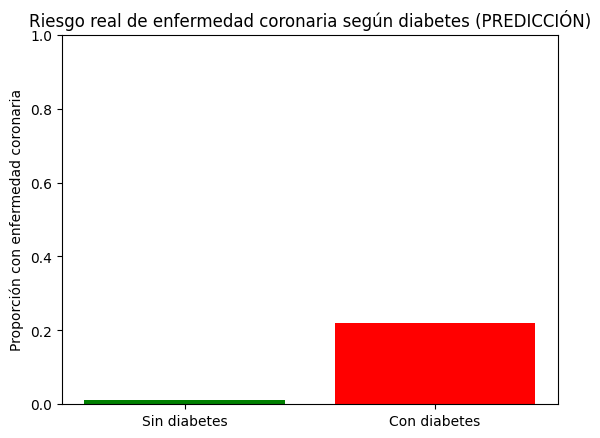

In [15]:
df_pred = df.copy()
df_pred['y_pred'] = y_pred

riesgo_por_diabetes = df_pred.groupby('diabetes')["y_pred"].mean()

labels = ['Sin diabetes', 'Con diabetes']
valores = riesgo_por_diabetes.values

plt.bar(labels, valores, color=['green', 'red'])
plt.ylabel('Proporción con enfermedad coronaria')
plt.title('Riesgo real de enfermedad coronaria según diabetes (PREDICCIÓN)')
plt.ylim(0, 1)
plt.show()
